In [1]:
import numpy as np
import src.pyletkf as pyletkf
import scipy as sp

In [2]:
lsmask = np.array([[1,1,1],
                   [1,1,1],
                   [1,0,0]])
ocean = np.array([[0,0,0],
                  [0,0,0],
                  [0,1,1]])

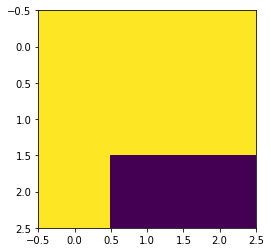

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(lsmask)

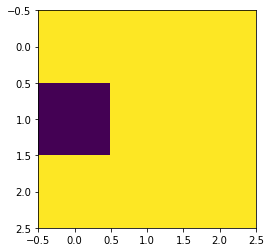

In [4]:
excGrid = np.array([[1,1,1],
                    [0,1,1],
                    [1,1,1]])
plt.imshow(excGrid)

In [5]:
obs_mask = lsmask
obs = np.ones([10,3,3])*10 + np.abs(np.random.normal(10,5,[10,3,3]))

In [6]:
def forward(x):
    xNext = np.abs(x*np.cos(5*x))
    return xNext

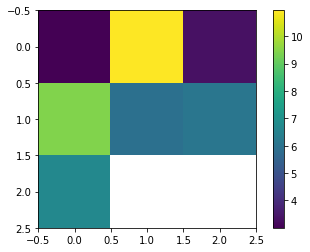

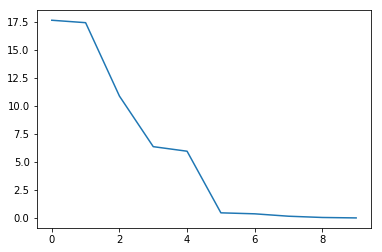

In [7]:
for t in range(1,10):
    obs[t] = forward(obs[t-1]) + np.random.normal(0,0.05)
obs = obs*obs_mask
obs[np.where(obs==0)] = -9999
plt.figure();plt.imshow(np.ma.masked_less(obs.mean(axis=0),-5000));plt.colorbar()
plt.figure();plt.plot(obs[:,1,1])

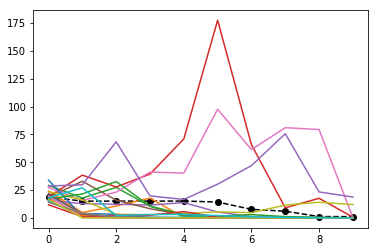

In [8]:
sim = np.ones([10,20,3,3])*10 + np.abs(np.random.normal(10,5,[10,20,3,3]))
for e in range(0,20):
    for t in range(1,10):
        sim[t,e,:,:] = forward(sim[t-1,e,:,:] + sim[t-1,e,:,:]*np.random.normal(0,1,[3,3]))
plt.figure()
plt.plot(obs[:,0,1],label="observation",color="k",linestyle="--",marker="o")
for e in range(0,20):
    plt.plot(sim[:,e,0,1])

In [9]:
am = pyletkf.LETKF_core()
am.assimN = 1
am.assimS = -1
am.assimE = 1
am.assimW = -1
am.patch = 1
am.ensMem = 20
am.nLon = 3
am.nLat = 3
am.res = 1.
am.north = 1
am.south = -1
am.east = 1
am.west = -1
am.undef = -9999
am.errfix = 0.90

In [10]:
#time step 2
t = 5
sim_t = sim[t].astype(np.float32)
obs_t = obs[t].astype(np.float32)
ax = am.letkf(sim_t,obs_t,ocean.astype(np.float32),excGrid.astype(np.float32))
print(ax.shape)
print(sim_t-ax)

x:0,y:0:obs:6,ocean:0
x:0,y:0:assimilated
x:0,y:1:obs:5,ocean:0
x:0,y:1:assimilated
x:0,y:2:obs:0,ocean:0
x:0,y:2:not assimilated
x:1,y:0:obs:5,ocean:0
x:1,y:0:assimilated
x:1,y:1:obs:6,ocean:0
x:1,y:1:assimilated
x:1,y:2:obs:1,ocean:1
x:1,y:2:not assimilated
x:2,y:0:obs:0,ocean:0
x:2,y:0:not assimilated
x:2,y:1:obs:2,ocean:0
x:2,y:1:assimilated
x:2,y:2:obs:2,ocean:1
x:2,y:2:not assimilated
(20, 3, 3)
[[[-3.6545244e-01 -1.3144294e+01 -3.7964553e-01]
  [-4.0191254e-01 -3.1860816e-01  2.9890614e+01]
  [-7.0138866e-01  2.5383644e+00 -1.0305225e+00]]

 [[-9.1145009e-01 -1.3225342e+01 -2.0311722e-01]
  [-1.6110063e-02  1.6585430e+00  3.6476889e+00]
  [-8.0311543e-01  2.7231882e+01  2.7161617e+00]]

 [[-6.4156950e-01 -1.2570203e+01  1.7932172e+00]
  [ 4.7242942e-01  1.2119478e+01 -1.3064280e-01]
  [ 2.9378724e-01 -3.8877732e-01 -9.5541960e-01]]

 [[ 3.0499649e+00  1.6388251e+02 -4.5162007e-01]
  [ 2.1025651e+00  1.8282864e+01  2.7423501e-01]
  [-7.1098310e-01 -4.6548831e-01 -1.0599567e+00]]


[ 0.50258738  0.59603727  0.1776112   0.63059449  0.81275666 -0.048509
  0.01182732  2.02259684  0.0171147   0.57645011  0.11989716  0.19798407
  0.36630493  0.94113469  0.42006907  1.6280992   1.1711483   0.62959617
  0.04782856  0.05792883]


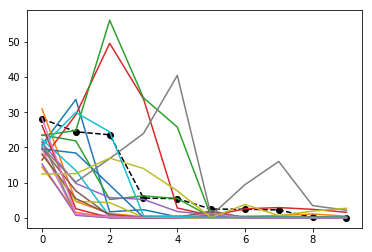

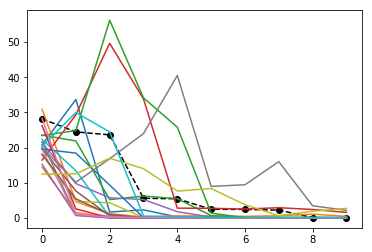

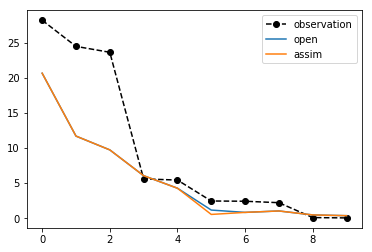

In [11]:
new = sim.copy()
new[t] = ax
x = 0
y = 1
plt.figure()
plt.plot(obs[:,y,x],label="observation",color="k",linestyle="--",marker="o")
for e in range(0,20):
    plt.plot(new[:,e,y,x])
print(new[t,:,y,x])
plt.figure()
plt.plot(obs[:,y,x],label="observation",color="k",linestyle="--",marker="o")
for e in range(0,20):
    plt.plot(sim[:,e,y,x])
plt.figure()
plt.plot(obs[:,y,x],label="observation",color="k",linestyle="--",marker="o")
plt.plot(sim[:,:,y,x].mean(axis=1),label="open")
plt.plot(new[:,:,y,x].mean(axis=1),label="assim")
plt.legend()